In [11]:
import pandas as pd

# Let's read data from NY times
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

# Engineer new cases
df['new_cases'] = df.cases - df.cases.shift().fillna(0)

# Create pandas time series
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

# Create timeseries readable by prophet
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [12]:
from prophet import Prophet

# Let's create the model and fit the timeseries
prophet = Prophet()
prophet.fit(ts)

# Create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

# Display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.19782
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          2489    0.00182554       83.2381           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2493.65   0.000195581       54.3171      0.3573           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225        2493.7   0.000357796       86.1892   4.838e-06       0.001      318  LS failed, Hessian reset 
     269        2493.8   0.000388741       181.007   3.005e-06       0.001      412  LS failed, Hessian reset 
     299       2493.86   1.38641e-05       78.5971           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       2493.86   1.67778e-07       55.4113           1           1      504   
Optimization terminat

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,282542.700882,173857.111760,402140.512865
1,2020-01-22,281757.149884,181993.338581,386029.418567
2,2020-01-23,252935.582390,141310.700020,360794.298685
3,2020-01-24,234306.556644,130700.964060,344754.480447
4,2020-01-25,161961.519331,59536.562525,268256.715141


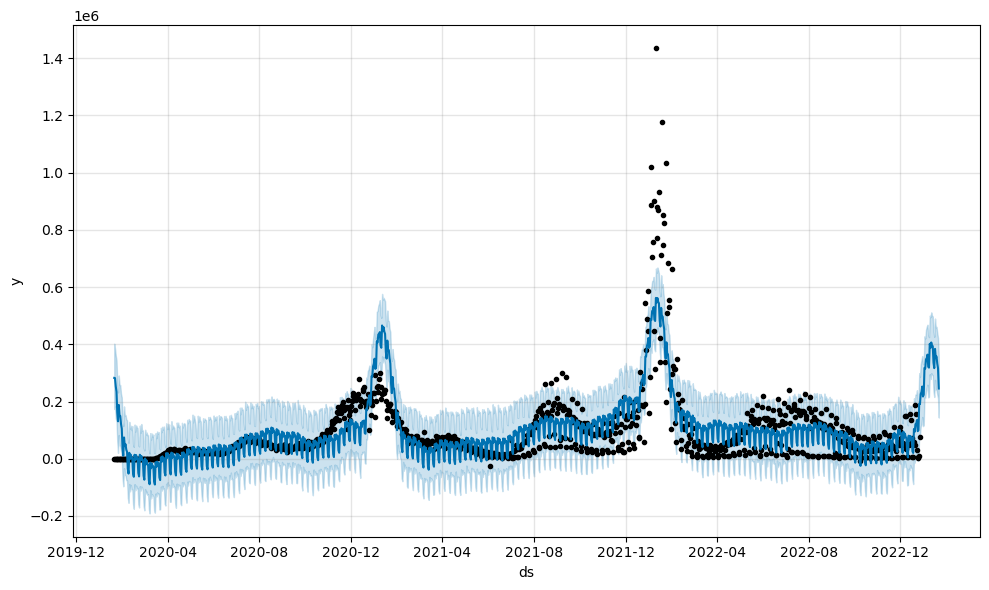

In [13]:
# plot
fig = prophet.plot(forecast)

In [14]:
# Let's create the model and fit the timeseries
prophet = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet.fit(ts)

# Create a future data frame 
future = prophet.make_future_dataframe(periods=25)
forecast = prophet.predict(future)

# Display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.19782
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2468.4     0.0298417       965.864           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2544.63     0.0357872       248.149      0.8019      0.8019      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2576.06     0.0207914       78.5015      0.2389      0.9644      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2585.45    0.00384799       170.137           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2604.31     0.0344539       98.6032           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,103696.505630,14423.386050,189379.419361
1,2020-01-22,92014.655648,7157.311789,178647.934737
2,2020-01-23,79883.386762,453.441301,158138.415043
3,2020-01-24,67482.216558,-17731.001700,156230.550384
4,2020-01-25,54991.938223,-32268.894543,145727.439581


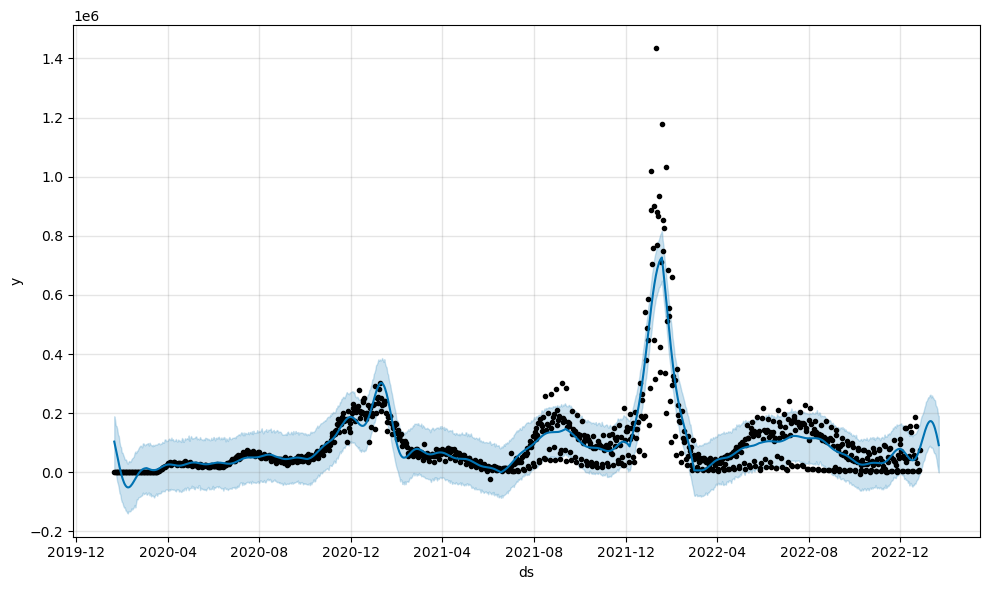

In [15]:
# Plot
fig = prophet.plot(forecast)